# Half Ring Resonator

We'll briefly show you how to simulate a half ring resonator using `SiPANN.scee`.

First do the imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SiPANN.scee import HalfRing

def pltAttr(x, y, title=None, legend='upper right', save=None):
    if legend is not None:
        plt.legend(loc=legend)
    plt.xlabel(x)
    plt.ylabel(y)
    if title is not None:
        plt.title(title)
    if save is not None:
        plt.savefig(save)

Declare all of our geometries (note they're all in nm)

In [2]:
r = 10000
w = 500
t = 220
wavelength = np.linspace(1500, 1600)
gap = 100

And we can simulate using either `Halfring.sparams` or `Halfring.predict()`. Using `predict()` this looks like

In [3]:
hr = HalfRing(w, t, r, gap)
k = hr.predict((1,4), wavelength)
t = hr.predict((1,3), wavelength)

And if you want to visualize what the device looks like,

In [4]:
hr.gds(view=True,extra=0,units='microns')

![halfring](HalfRing_files/gdsView.png)

And plotting the output gives us

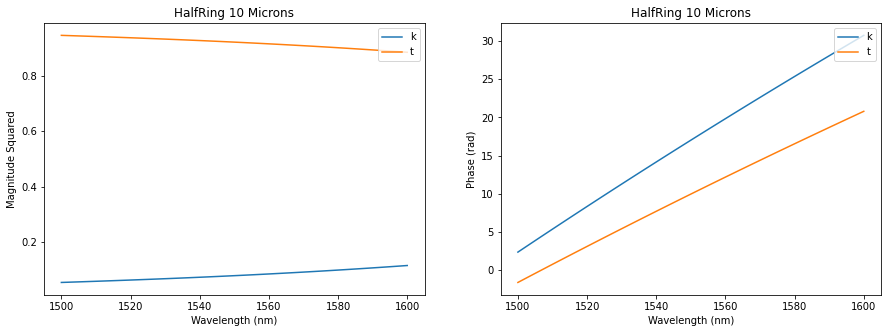

In [5]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(wavelength, np.abs(k)**2, label='k')
plt.plot(wavelength, np.abs(t)**2, label='t')
pltAttr('Wavelength (nm)', 'Magnitude Squared', 'HalfRing 10 Microns')
plt.subplot(122)
plt.plot(wavelength, np.unwrap(np.angle(k)), label='k')
plt.plot(wavelength, np.unwrap(np.angle(t)), label='t')
pltAttr('Wavelength (nm)', 'Phase (rad)', 'HalfRing 10 Microns')

SCEE also supports sweeping over geometries while holding wavelengths fixed. This can be done as:

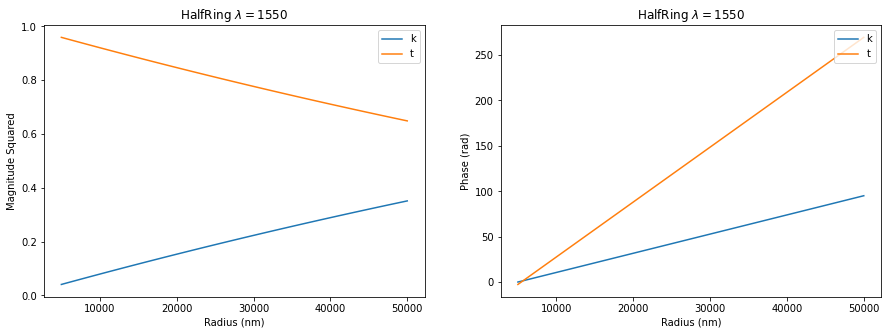

In [6]:
r = np.linspace(5000, 50000, 100)
wavelength = 1550
hr.update(radius=r)

k = hr.predict((1,4), wavelength)
t = hr.predict((1,3), wavelength)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(r, np.abs(k)**2, label='k')
plt.plot(r, np.abs(t)**2, label='t')
pltAttr('Radius (nm)', 'Magnitude Squared', 'HalfRing $\lambda=1550$')
plt.subplot(122)
plt.plot(r, np.unwrap(np.angle(k)), label='k')
plt.plot(r, -np.unwrap(np.angle(t)), label='t')
pltAttr('Radius (nm)', 'Phase (rad)', 'HalfRing $\lambda=1550$')

All elements found in SiPANN.scee can be simulated basically identically.